# __Final Project Proposal__
## Hotel Reservation Cancellation Prediction
- Group Members: Qing Dou, Ruoyu Chen, Zhengnan Li
- Repository: https://github.com/jc000222/Data_Science_DAV6150/tree/main/FinalProject

# 1 Abstract

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
import numpy as np
warnings.filterwarnings('ignore', category=FutureWarning)

# 2 Introduction 

In this project, we aim to create a predictive model that can be used to accurately predict whether a hotel reservation will be canceled. This is important for hotels because canceled bookings can severely impact a hotel's revenue and related operational strategies. Accurate information about room reservations is key to decrease the hotel losses, such as the profit loss of last-minute cancellations. Whether a hotel receives advance notice or not, these cancellations result in vacancies in their booked rooms that could have been re-rented to others. However when cancellations are received at the last minute, which can make it difficult to schedule re-released rooms. 

The negative impact of cancellations includes not only the loss of revenue from these vacant rooms, but also the additional costs associated with the distribution channel for re-booking, as well as lower profit margins due to having to sell the rooms at a reduced price at the last minute. However, by accurately predicting cancellations and taking steps that can effectively decrease the negative impact of cancellations, hotels can improve profitability and operational efficiency. We utilize a dataset containing a wide range of booking-related factors to provide valuable insights for hotel management. Our goal is to build a robust model that helps hotels refine their operational processes and maximize the revenue.

### 2.1 Literature Review: 
This data has been used in many literatures for machine learning, and we select a few to show the scope of the researches others have done.  

__Application of machine learning to cluster hotel booking curves for hotel demand forecasting__  
Link: https://www.sciencedirect.com/science/article/pii/S2352340918315191  
This study proposes a new method for daily hotel demand forecasting, leveraging clusters of stay dates from historical booking data. Results indicate improved accuracy in demand forecasts when generated at the cluster level, aiding data-driven revenue management amidst the COVID-19 pandemic's demand fluctuations.
__Forecasting Hotel Demand Using Machine Learning Approaches__  
Link: https://www.researchgate.net/publication/340134067_Forecasting_Hotel_Demand_Using_Machine_Learning_Approaches  
This study compares traditional pick-up based models with machine learning approaches for forecasting hospitality demand, demonstrating the superior performance of machine learning models, especially with longer booking histories. These findings have practical implications for improving forecast accuracy and revenue optimization in hotel management, while also laying the foundation for future research in refining machine learning models for revenue management.
__Prediction of hotel booking cancellations: Integration of machine learning and probability model based on interpretable feature interaction__  
link:
https://www.sciencedirect.com/science/article/pii/S0167923623000349  
The scope of the research is to enhance hotel cancellation prediction by proposing an interpretable feature interaction method and integrating Bayesian networks and Lasso regression models. 

| Model                                    | Accuracy   | Recall    | Precision  | F1-score  |
|------------------------------------------|------------|-----------|------------|-----------|
| BN                                       | 0.7818     | 0.3890    | 0.6891     | 0.4972    |
| Lasso-original                          | 0.7624     | 0.2225    | 0.7455     | 0.3428    |
| Lasso-original-Bayesian                 | 0.7823     | 0.3936    | 0.6914     | 0.5016    |
| Lasso-original-Bayesian-interaction     | 0.8186     | 0.5097    | 0.7597     | 0.6101    |

### 2.2 Reasearch Questions
1. __What are the key factors affecting hotel booking cancellation, and how can we predict the cancellations?__  
    The research into factors influencing hotel booking cancellations and predictive modeling can have significant implement for the hotel bussiness. Most online travel agency have loose cancellation policy for users, in oreder to encourage the booking activities. However the pressure for handling the cancellations falls on the hotels, for cancelled rooms lead to revenue loss and reduced profits due to price reductions, and increase advertising costs. By identifying key factors in booking information that contribute to cancellations, such as lead time, deposit type, and special requests, hotels can predict the cancellation of the booking orders and  make informed decisions about overbooking, room pricing, and staffing levels, ultimately enhancing efficiency, profitability, and customer satisfaction.In addition, we believe that weather conditions are also an important factor affecting hotel reservation cancellations, so we also imported the weather conditions in Lisbon, Portugal from 2015 to 2017.  
    With this predictive model, hotels can proactively identify which users are likely to cancel their bookings and take remedial actions in a timely manner. For instance, by reaching out to users with a higher likelihood of cancellation in advance, hotels can encourage them to cancel their bookings as early as possible, thereby allowing the hotel to free up more rooms for sale.Alternatively, hotels can also engage with users who show tendencies to cancel by highlighting the advantages of staying at the hotel and offering incentives or rewards for staying, aiming to persuade them to retain their bookings.
    
2. __Does different time in years have different patterns when predicting booking cancellations using ARIMA?__
    Analyzing the impact of time of year on hotel booking cancellations using ARIMA can provide valuable insights into seasonal trends and fluctuations in cancellation behavior. By applying ARIMA models to time series data segmented by different periods of the year, such as months or seasons, we can identify patterns and seasonal variations in cancellation rates. Understanding how cancellation patterns vary throughout the year can help hotels optimize their revenue management strategies, staffing levels, and promotional activities to effectively manage cancellations and maximize occupancy rates during peak and off-peak periods. For example, if ARIMA analysis reveals a consistent increase in cancellation rates during certain months, hotels can adjust their pricing strategies or implement targeted marketing campaigns to mitigate potential revenue loss.


### 2.3 Data to be Used
The data we will be using is sourced from github: https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-02-11 and visual crossing: https://www.visualcrossing.com/weather/weather-data-services. We will be using pandas to read the raw file directly from the website. To maintain consistency, we download the raw file from the website, save it to our own repository, and then use pandas to read the CSV file.  
The first Data set contains 119390 rows of observation and 32 variables.The second dataset about weather from 2015 to 2017 will be filtered in the future analysis.  


__Data Dictionary__

| Variable                        | Description                                                                                                          |
|--------------------------------|----------------------------------------------------------------------------------------------------------------------|
| hotel                          | Hotel (Resort Hotel or City Hotel)                                                                         |
| lead_time                      | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date             |
| arrival_date_year              | Year of arrival date                                                                                                 |
| arrival_date_month             | Month of arrival date                                                                                                |
| arrival_date_week_number       | Week number of year for arrival date                                                                                 |
| arrival_date_day_of_month      | Day of arrival date                                                                                                  |
| stays_in_weekend_nights        | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel                       |
| stays_in_week_nights           | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel                            |
| adults                         | Number of adults                                                                                                     |
| children                       | Number of children                                                                                                   |
| babies                         | Number of babies                                                                                                     |
| meal                           | Type of meal booked. Categories are presented in standard hospitality meal packages                                 |
| country                        | Country of origin. Categories are represented in the ISO 3155–3:2013 format                                         |
| market_segment                 | Market segment designation. In categories, the term "TA" means "Travel Agents" and "TO" means "Tour Operators"      |
| distribution_channel           | Booking distribution channel. The term "TA" means "Travel Agents" and "TO" means "Tour Operators"                   |
| is_repeated_guest              | Value indicating if the booking name was from a repeated guest (1) or not (0)                                       |
| previous_cancellations         | Number of previous bookings that were cancelled by the customer prior to the current booking                          |
| previous_bookings_not_canceled | Number of previous bookings not cancelled by the customer prior to the current booking                               |
| reserved_room_type             | Code of room type reserved. Code is presented instead of designation for anonymity reasons                           |
| assigned_room_type             | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons | 
| booking_changes                | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
| deposit_type                   | Indication on if the customer made a deposit to guarantee the booking                                                |
| agent                          | ID of the travel agency that made the booking                                                                        |
| company                        | ID of the company/entity that made the booking or responsible for paying the booking                                  |
| days_in_waiting_list           | Number of days the booking was in the waiting list before it was confirmed to the customer                           |
| customer_type                  | Type of booking, assuming one of four categories                                                                     |
| adr                            | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
| required_car_parking_spaces    | Number of car parking spaces required by the customer                                                                |
| total_of_special_requests      | Number of special requests made by the customer (e.g. twin bed or high floor)                                        |
| reservation_status             | Reservation last status, assuming one of three categories                                                            |
| reservation_status_date        | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus           |


In [2]:
hotel_raw = pd.read_csv("https://raw.githubusercontent.com/jc000222/Data_Science_DAV6150/main/FinalProject/hotel.csv")
display(hotel_raw.shape)
hotel_raw.head(5)

(119390, 33)

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


- Dataset 2

In [3]:
weather_raw = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/DAV-6150/main/Final_project/src/Lisbon%2CPortugal%202015-01-01%20to%202017-09-26.csv')
display(weather_raw.shape)
weather_raw.head(5)

(1000, 33)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Lisbon,Portugal",2015-01-01,14.7,2.9,8.5,14.7,2.1,7.9,1.1,61.4,...,10.0,5,NaN,2015-01-01T07:54:47,2015-01-01T17:25:26,0.37,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,08536099999,LPPT,08579..."
1,"Lisbon,Portugal",2015-01-02,12.6,2.3,7.9,12.6,0.1,6.8,3.9,77.2,...,10.2,5,NaN,2015-01-02T07:54:55,2015-01-02T17:26:15,0.40,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"08535099999,08534099999,08536099999,LPPT,08579..."
2,"Lisbon,Portugal",2015-01-03,13.9,4.2,8.6,13.9,1.9,7.6,2.9,69.0,...,10.2,5,NaN,2015-01-03T07:55:01,2015-01-03T17:27:05,0.44,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,08536099999,LPPT,08579..."
3,"Lisbon,Portugal",2015-01-04,14.0,3.2,8.2,14.0,3.2,7.7,4.2,77.0,...,10.2,5,NaN,2015-01-04T07:55:05,2015-01-04T17:27:57,0.48,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,08536099999,LPPT,08579..."
4,"Lisbon,Portugal",2015-01-05,12.4,2.4,7.6,12.4,1.0,7.2,5.3,86.0,...,8.9,5,NaN,2015-01-05T07:55:07,2015-01-05T17:28:50,0.50,Clear,Clear conditions throughout the day.,clear-day,"08532099999,08535099999,08534099999,0853609999..."


- Merged Dataset  
    Perform a inner join on the datetime for the two datasets. The observation number of 'hotel_raw' stays the same as 119390.

In [4]:
date_str = hotel_raw['arrival_date_year'].astype(str) + '-' + hotel_raw['arrival_date_month'].astype(str) + '-' + hotel_raw['arrival_date_day_of_month'].astype(str)
hotel_raw['datetime'] = pd.to_datetime(date_str)
weather_raw['datetime'] = pd.to_datetime(weather_raw['datetime'])
hotel_raw = pd.merge(hotel_raw, weather_raw, on='datetime', how='inner')
display(hotel_raw.shape)

(119390, 66)

### 2.4 Project Report Structure
__1. Abstract:__ Summarize our problem, methodology, and major outcomes.  
__2. Introduction:__ Briefly describe the purpose and motivation behind the project, introduce the dataset, including its origin, size, and the types of variables it contains and clearly state the question or problem our project aims to address.  
__3. Exploratory Data Analysis:__ Conduct an initial exploration to understand the dataset's characteristics, such as distributions of key variables, presence of missing values, and potential outliers.The following are diagrams that may be used.  
- Correlation Heatmaps: To visualize the relationships between different variables and identify those most correlated with booking cancellations.
- Bar Charts and histogram: To illustrate the distribution of categorical variables like hotel type, deposit type, and market segment.
- Box Plots: To explore the distribution of numerical variables and identify outliers or anomalies that could affect cancellation predictions.  

__4. Data Preparation:__ Clean and preprocess the data to enhance its quality and suitability for modeling, including addressing missing values, outliers, and feature engineering.  
__5. Prepped Data Overview:__ Conduct a secondary EDA on the prepared data to verify its readiness for modeling and to refine the analysis strategy.  
__6. Machine Learning Models:__ Build the models to identify the most effective approach for the research question. Thses are models we are going to use:  
- Logistic Regression: Logistic Regression is a statistical method widely used for binary classification problems, predicting the probability of an event occurring. In the context of hotel booking cancellations, it can be used to estimate the probability of a booking being canceled.The model is simple and highly interpretable, making it suitable as a baseline model.
- Neural Network Model: Neural Networks mimic the structure and function of the human brain, suitable for dealing with complex nonlinear problems. With a multi-layered structure, neural networks can capture and learn deep features and patterns in the data. And the model is with powerful data fitting capabilities, particularly effective for large-scale and high-dimensional datasets.
- Decision Tree Model: Decision Trees split the data through a series of rules, each split representing a decision node, until the prediction objective is reached. It is an intuitive model that clearly shows the decision-making process and logic. The model is easy to understand and interpret, visually representing the decision-making process.

__7. Model Selection:__ Evaluate model performance using metrics such as confusion matrix, accuracy, recall, F1 score, and ROC curve.Compare the performance of different models to identify the most suitable one for predicting hotel booking cancellations.  
__8. Ensemble Model:__  In addition to these individual models, an ensemble approach will be considered to combine the predictions from each model to improve overall accuracy. The ensemble method could be a simple voting ensemble, where predictions from each model are combined to make a final decision, or a more complex stacking approach, where the outputs of individual models serve as inputs to a final model that makes the ultimate prediction.  
__9. Conclusions:__  Summarize the project's findings, the efficacy of the selected model, and suggest avenues for future research building on the current work.

# 3 Explanatory Data Analysis

First define the functions and variable names to be used for EDA.

In [5]:
sns.set(style="whitegrid")
def hist(attributes):
    
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.histplot(data=hotel_raw[attributes[0]], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 4))
        for i in range(len(attributes)):
            sns.histplot(ax=axes[i], data=hotel_raw[attributes[i]])
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
    plt.show()
def box(attributes):
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.boxplot(data=hotel_raw[attributes[0]], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 4))
        for i in range(len(attributes)):
            sns.boxplot(ax=axes[i], data=hotel_raw[attributes[i]])
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
    plt.show()
def bar(attributes,df):
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.countplot(x=df[attributes[0]], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 4))
        for i in range(len(attributes)):
            sns.countplot(ax=axes[i], x=df[attributes[i]])
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
    plt.show() 
def scatter(attributes):
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.scatterplot(x=hotel_raw[attributes[0]],y=hotel_raw["TARGET"], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('shares')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 4))
        for i in range(len(attributes)):
            sns.scatterplot(ax=axes[i], x=hotel_raw[attributes[i]],y=hotel_raw["TARGET"],alpha=0.1)
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
            axes[0].set_ylabel('shares')
    plt.show()
numeric_hotel = ['lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','reservation_status_date']
categorical_hotel = ['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type','reservation_status']
numeric_weather = ['tempmax','tempmin','temp','feelslikemax','feelslikemin','feelslike','dew','humidity','precip','precipprob','precipcover','snowdepth','windgust','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex','severerisk','stations']
categorical_weather = ['name','preciptype','snow','conditions','description','icon']

- __'Lead_time':__  
    The data is heavily left skewed, having most value on 0. 
- __'arrival_date_year','arrival_date_week_number','arrival_date_day_of_month', 'total_of_special_requests','reservation_status_date':__  
    The data is roughly evenly distributed.
- __'stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces':__   
    These variables has most value on the lower side, indicating a potential outliers of extreme value.

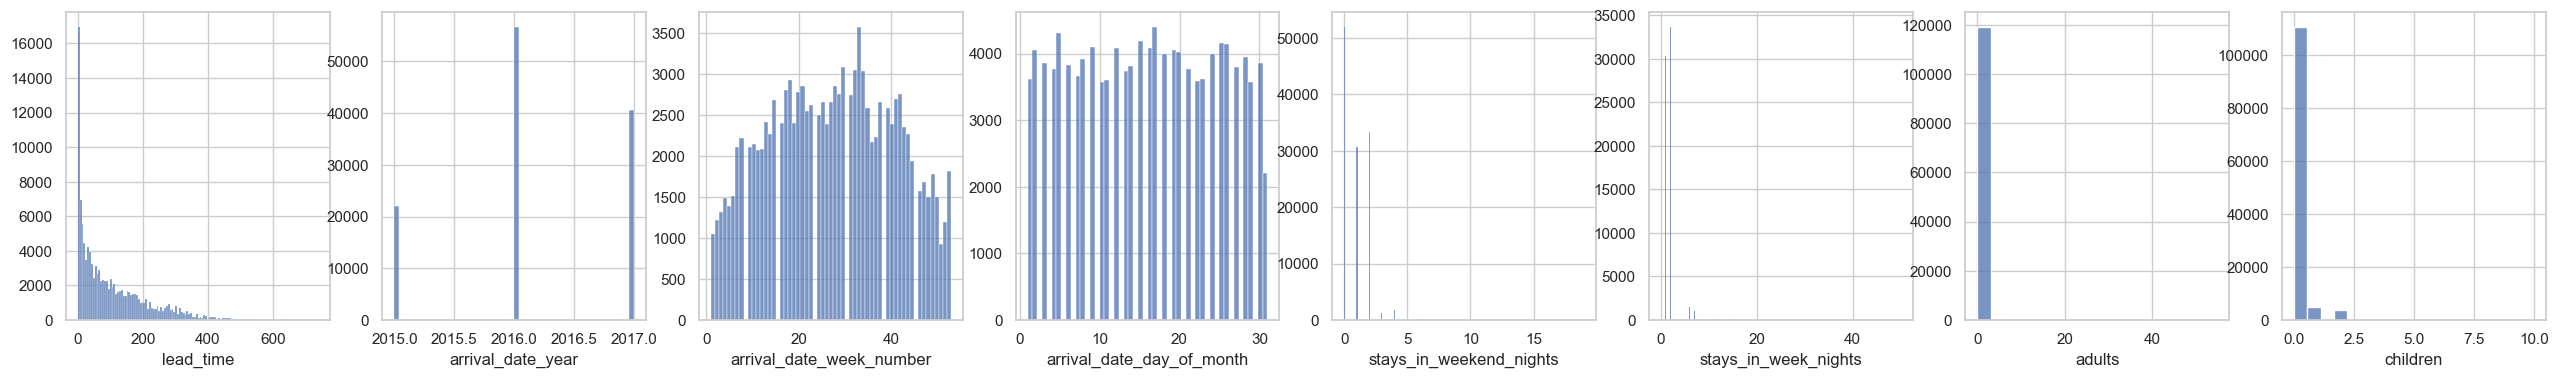

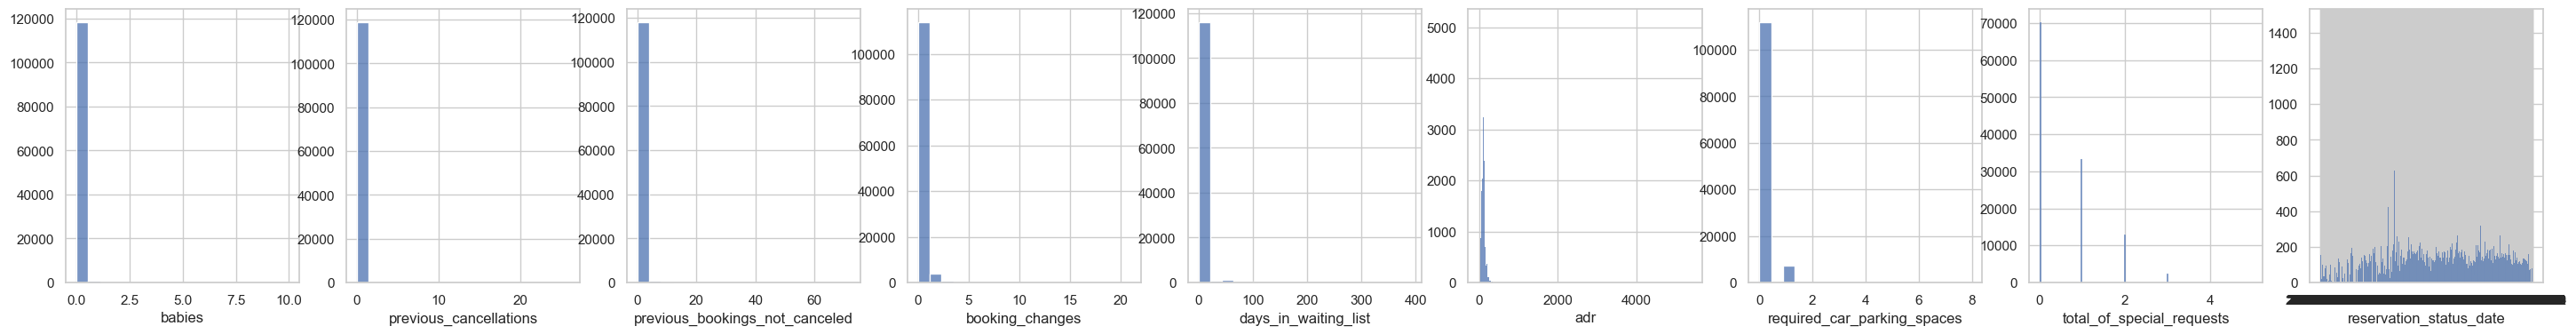

In [6]:
hist(numeric_hotel[:8])
hist(numeric_hotel[8:])

Categorical variables such as country, agent and company has too many categories and most of them are null values.  
There are undefined category in __'meal', 'distribution_channel'__.  
__'Reservation_status'__ has a risk of data leaking.

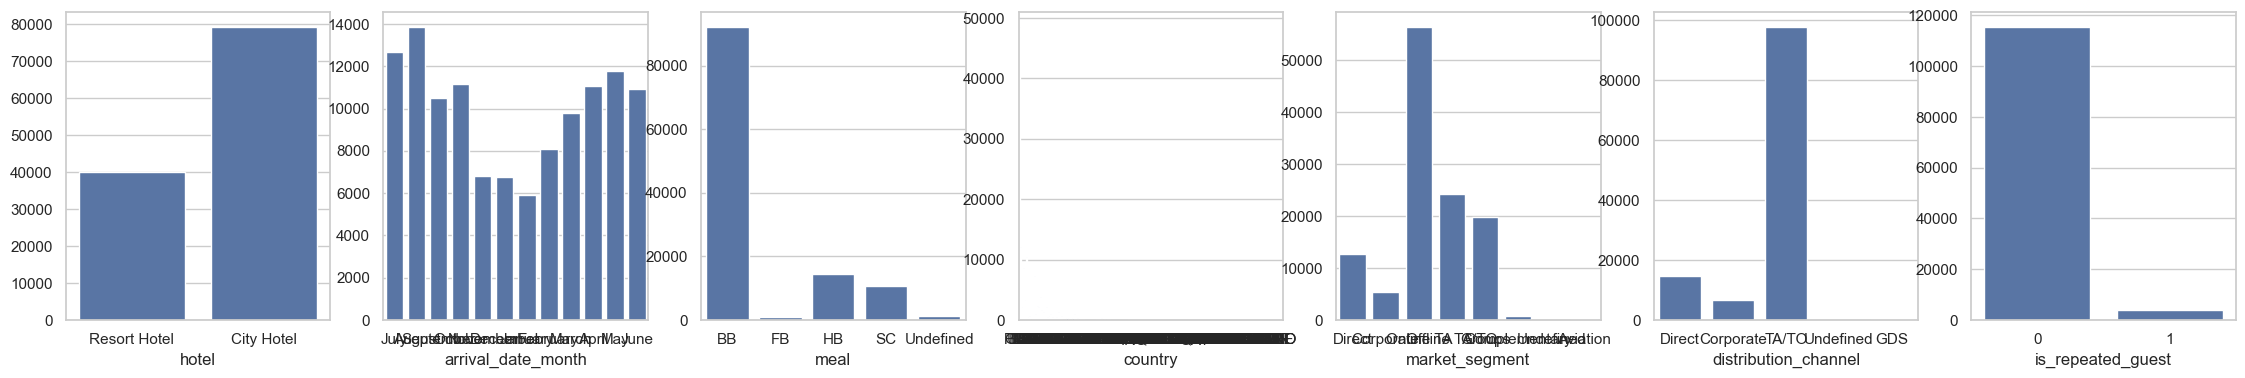

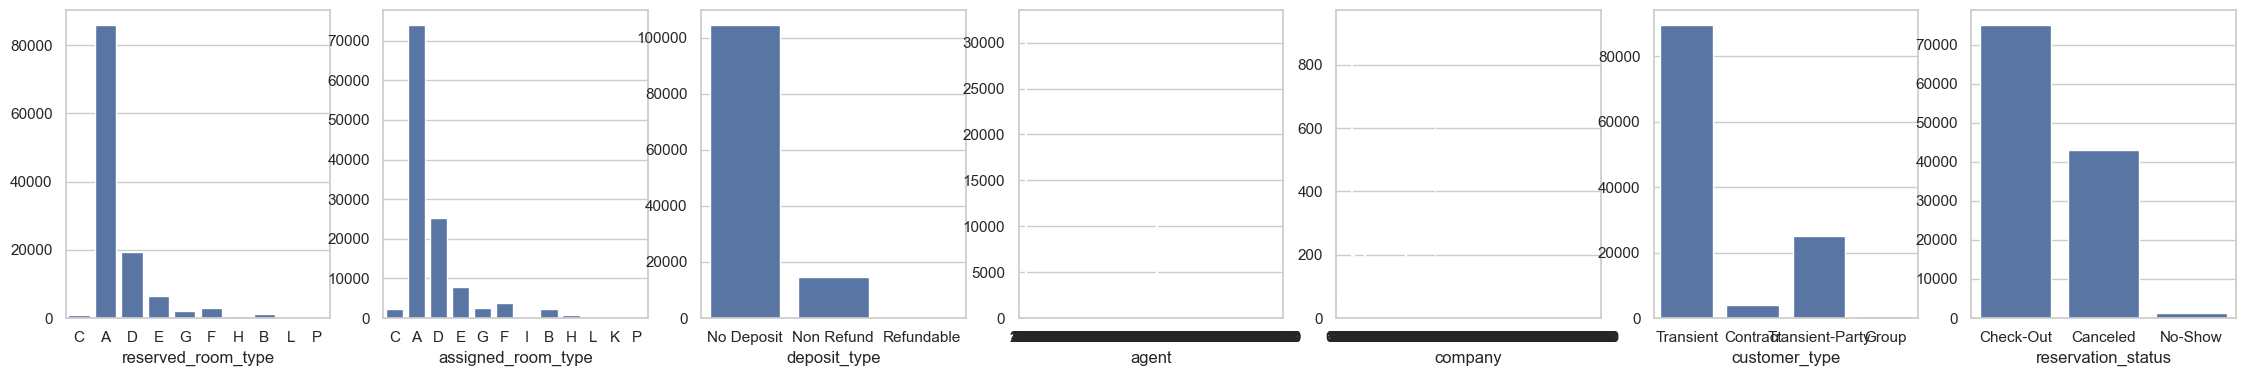

In [7]:
bar(categorical_hotel[:7],hotel_raw)
bar(categorical_hotel[7:],hotel_raw)

Most of the variable is close to a normal distribution. However, __'presip'__ has most value on 0, and __'snowdepth'__ has only one value, __'winddir'__ is right skewed.

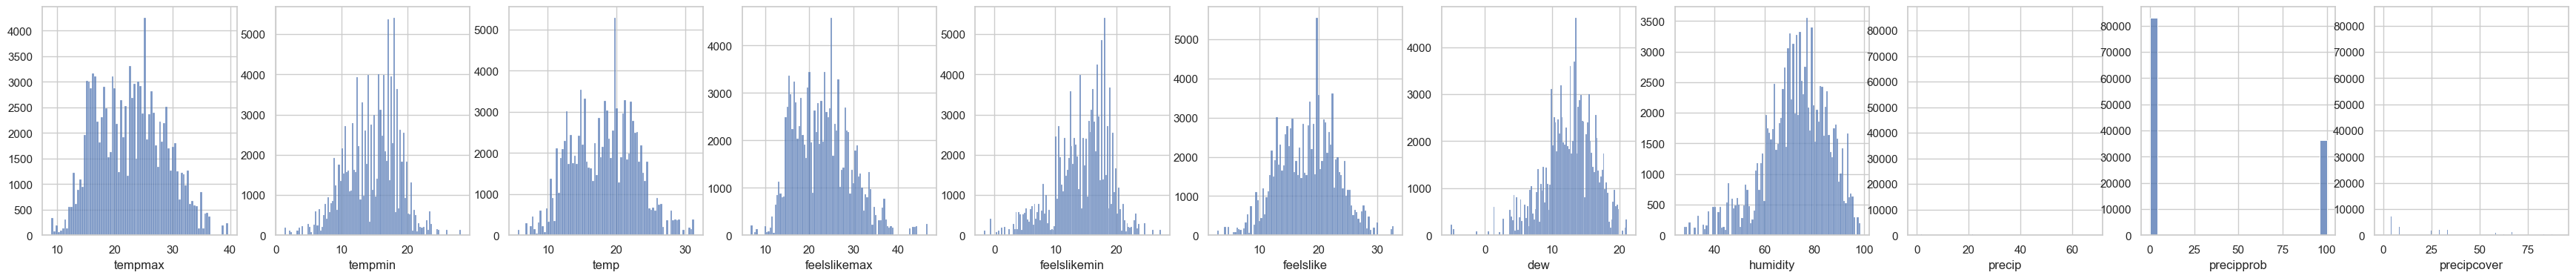

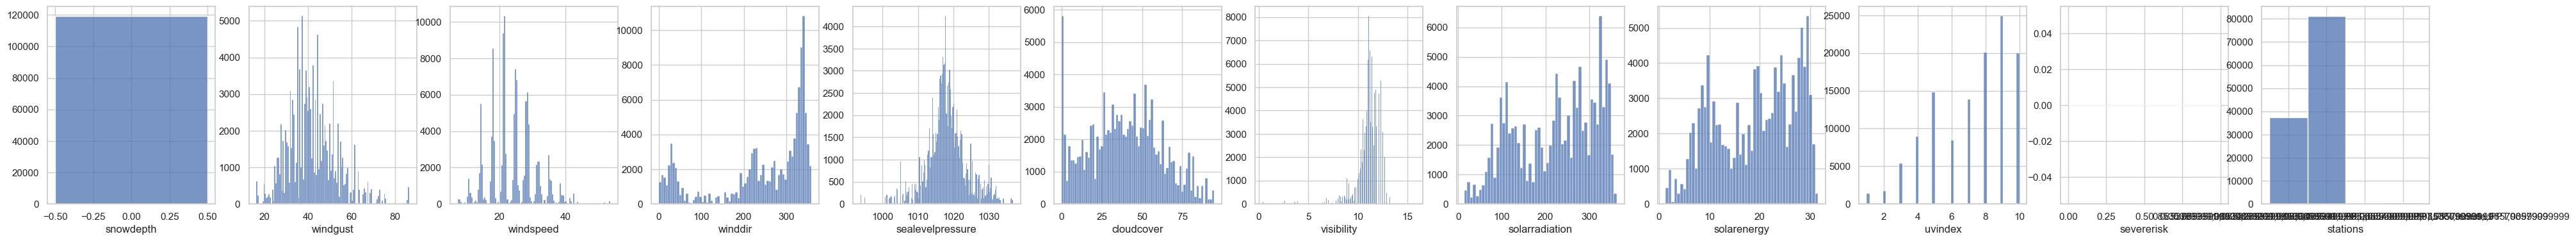

In [8]:
hist(numeric_weather[:11])
hist(numeric_weather[11:])

Variables such as __'name', 'preciptype', 'snow'__ is uni-valued.

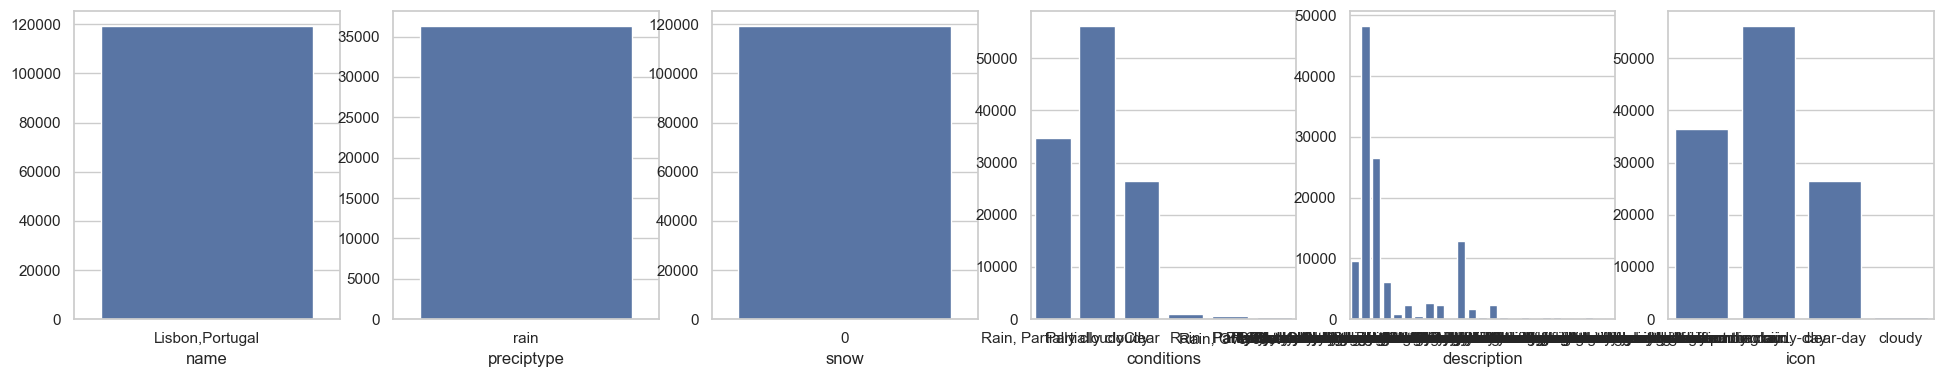

In [9]:
bar(categorical_weather,hotel_raw)

Target Variable
The data is slightly biased and the Null Error Rate is 0.62.

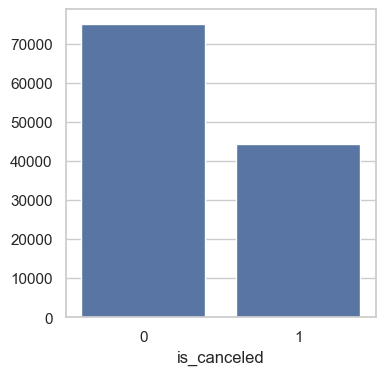

Null Error Rate: 0.6295837172292487


In [10]:
bar(['is_canceled'],hotel_raw)
class_counts = hotel_raw['is_canceled'].value_counts()
null_error_rate = (class_counts.max() / class_counts.sum())

print("Null Error Rate:", null_error_rate)

# 4 Data Preparation

### 4.1 Missing value
Variable __'severerisk', 'company','preciptype'__ has over half more null values, hence we will drop the column.
Variable __'country', 'children'__ has relatively small amount of null values, we will drop the observation with null values.

severerisk     119390
company        112593
preciptype      83059
agent           16340
country           488
children            4
Unnamed: 0          0
precipprob          0
snow                0
precipcover         0
dtype: int64

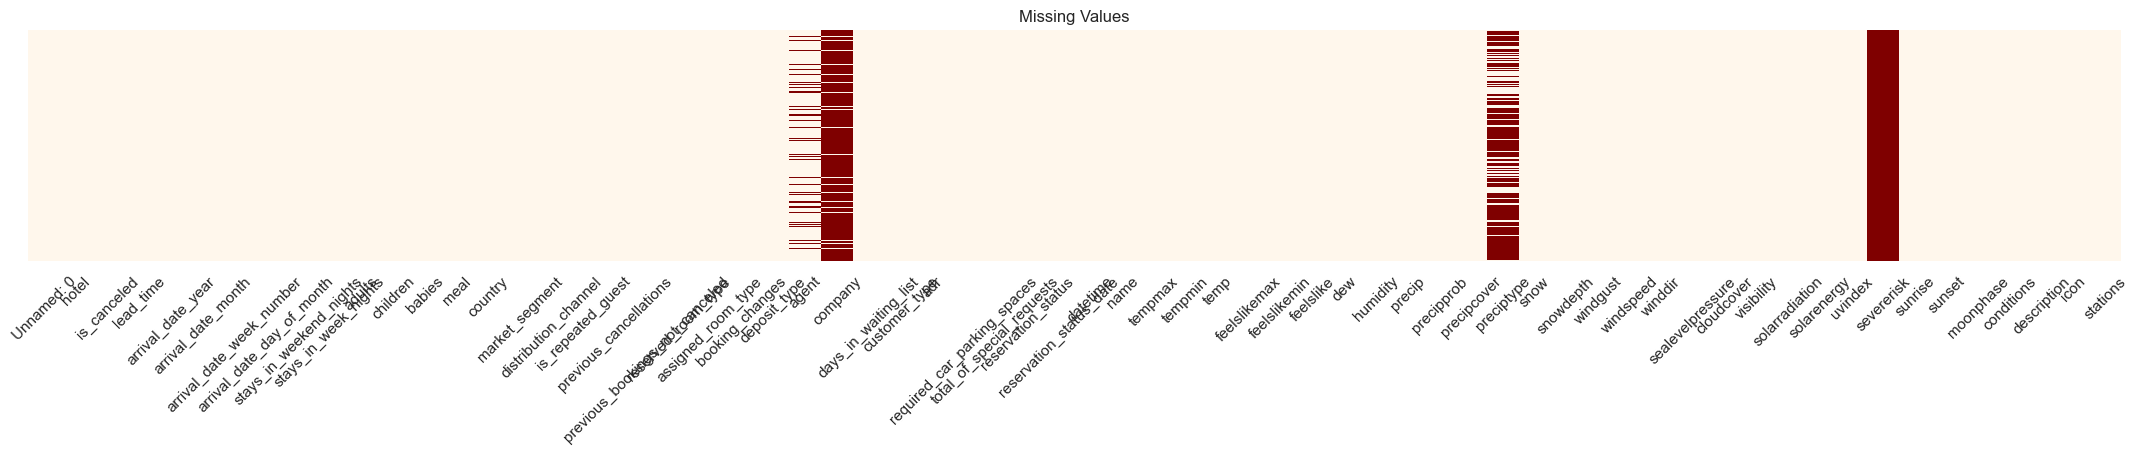

In [11]:
plt.rcParams["figure.figsize"] = (27, 3)
sns.heatmap(hotel_raw.isnull(), yticklabels=False, cbar=False, cmap="OrRd")
plt.title("Missing Values")
plt.xticks(rotation=45)
display(hotel_raw.isnull().sum().sort_values(ascending=False).head(10))

hotel_raw.drop(columns=['severerisk', 'company','preciptype'], inplace=True)
hotel_raw.dropna(subset=['country', 'children'], inplace=True)

Remove the undefined category from dataset.

In [12]:
hotel_raw = hotel_raw[(hotel_raw['meal'] != 'Undefined') | (hotel_raw['distribution_channel'] != 'Undefined')]

### 4.2 Outliers
Calculate the interquartile range (IQR), data points that fall below the first quartile or above the third quartile are considered outliers and will be removed.
For variable 'children', 'babies' and 'adr', remove the outliers manually.

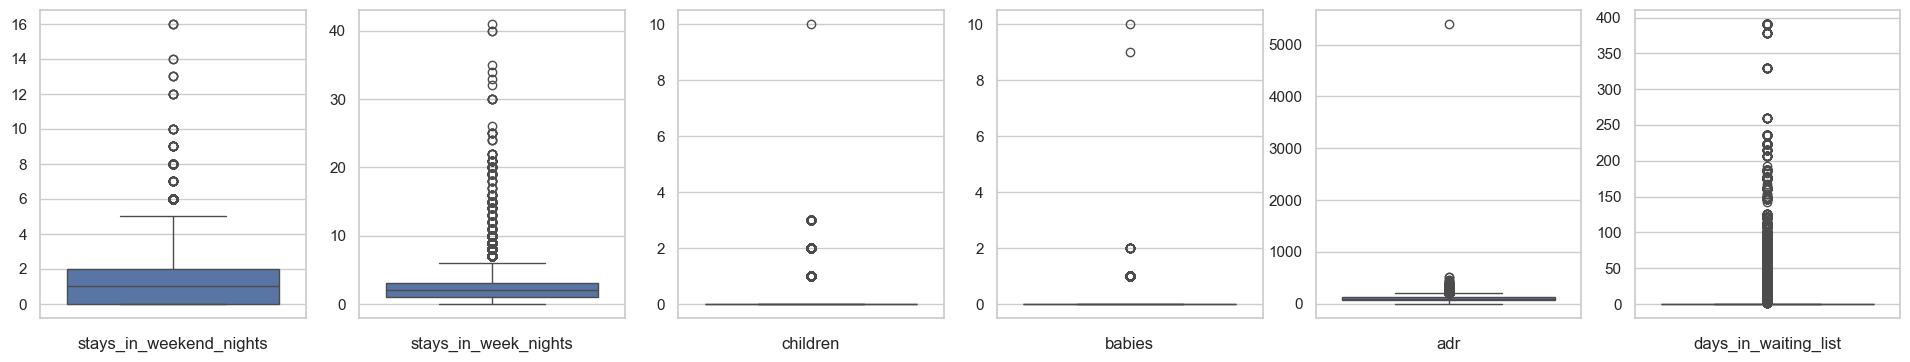

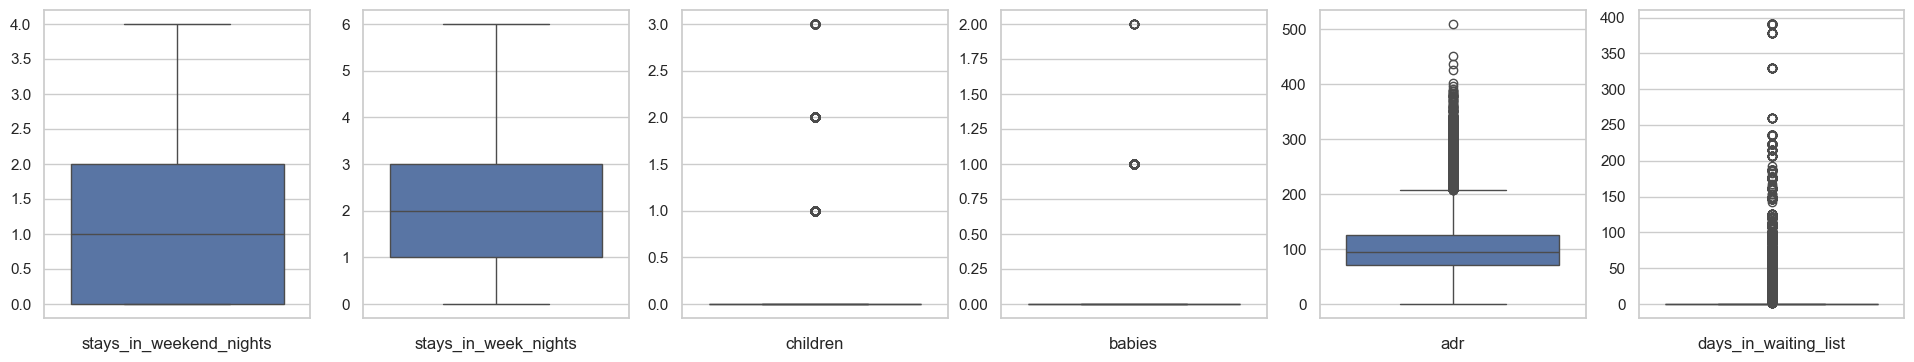

In [13]:
box(['stays_in_weekend_nights','stays_in_week_nights','children','babies','adr','days_in_waiting_list'])
columns_to_clean = ['stays_in_weekend_nights','stays_in_week_nights','previous_bookings_not_canceled']
for attribute in columns_to_clean:
    Q1 = hotel_raw[attribute].quantile(0.25)
    Q3 = hotel_raw[attribute].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    hotel_raw = hotel_raw[(hotel_raw[attribute] >= lower_bound) & (hotel_raw[attribute] <= upper_bound)]

hotel_raw = hotel_raw[hotel_raw['children'] < 10]
hotel_raw = hotel_raw[hotel_raw['babies'] < 8]
hotel_raw = hotel_raw[hotel_raw['adr'] < 1000]
box(['stays_in_weekend_nights','stays_in_week_nights','children','babies','adr','days_in_waiting_list'])

### 4.3 Feature Selection
- __'Unnamed: 0'__ will be dropped since it is the index of dataset;  
- __'agent' and 'stations'__ contains ID that has no meaning;  
- __'reservation__status','reservation__status__date'__ has potential data leak;  
- __'name','snow','snowdepth'__ has only one value.
- __'arrival__date__year', 'arrival__date__week__number', 'arrival__date__month', 'arrival__date__day__of__month'__ contains same information as __'datetime'__;  
- __'reserved__room__type' and 'assigned__room__type'__ are similar and wetransform them into a new binary variable __'reserved__room__change'__;  
- __'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin','feelslike'__ provide similar information on temperature. We will keep only 'temp';  
- __'dew', 'humidity', 'precip', 'precipprob', 'precipcover'__ provide similar information on rain. We keep only __'precipprob'__. And __'precipprob'__ has value only of 0 and 100 and with rain as the only preciptype, we will make it a binary variable 'rain';  
- __'windgust', 'windspeed', 'winddir'__ provide similar information on wind and we keep only __'windspeed'__;  
- __'cloudcover','solarradiation', 'solarenergy', 'uvindex'__ provide similar information on sun and we keep only 'uvindex'__;  
- __'sunrise','sunset', 'conditions', 'description', 'icon'__ are time information and combined information of previous variables.




In [14]:
hotel_raw['reserved_room_change'] = 0
hotel_raw.loc[hotel_raw['reserved_room_type'] != hotel_raw['assigned_room_type'], 'reserved_room_change'] = 1
hotel_raw['rain'] = 0
hotel_raw.loc[hotel_raw['precipprob'] == 100, 'rain'] = 1
columns_to_drop = ['Unnamed: 0','country', 'agent', 'stations','reservation_status','reservation_status_date','name','snow','snowdepth', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_month', 'arrival_date_day_of_month','reserved_room_type', 'assigned_room_type','tempmax', 'tempmin','feelslikemax', 'feelslikemin','feelslike','dew', 'humidity', 'precip', 'precipprob', 'precipcover','windgust', 'winddir','cloudcover','solarradiation', 'solarenergy','sunrise','sunset', 'conditions', 'description', 'icon']
hotel_cleaned = hotel_raw.drop(columns=columns_to_drop)

In [15]:
categorical_columns = ['hotel','meal','deposit_type','customer_type','distribution_channel','market_segment']
categorical_data = hotel_cleaned[categorical_columns]
dummy_variables = pd.get_dummies(categorical_data, columns=categorical_columns)

numeric_columns = [col for col in hotel_cleaned.columns if col not in categorical_columns]
numeric_data = hotel_cleaned[numeric_columns]

hotel = pd.concat([numeric_data, dummy_variables], axis=1)
hotel.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA
0,0,342,0,0,2,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
1,0,737,0,0,2,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2,0,7,0,1,1,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,0,13,0,1,1,0.0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
4,0,14,0,2,2,0.0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,True


### 4.4 Data Transform


In [16]:
X = hotel.drop('is_canceled', axis=1)
X_no_datetime = hotel.drop(['is_canceled','datetime'], axis=1)
y = hotel['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(X_no_datetime, y, test_size=0.3, random_state=37)

Step forward feature selection for training data.

In [17]:
# sfs = SFS(RandomForestClassifier(), 
#           k_features=20, 
#           forward=True, 
#           floating=False, 
#           verbose=2,
#           scoring='roc_auc',
#           cv=3)
# from sklearn.utils import parallel_backend

# n_jobs = 10  # Adjust this number based on your system's resources

# with parallel_backend('threading', n_jobs=n_jobs):
#     sfs = sfs.fit(X_train_nt, y_train_nt)


# selected_features = list(sfs.k_feature_idx_)

# if isinstance(X_train_nt, pd.DataFrame):
#     selected_feature_names = X_train_nt.columns[list(sfs.k_feature_idx_)].tolist()
#     print("Selected feature names:", selected_feature_names)

In [18]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'previous_cancellations',
           'booking_changes', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'temp',
           'windspeed', 'visibility', 'reserved_room_change', 'hotel_City Hotel', 'meal_BB', 'meal_HB',
           'deposit_type_No Deposit', 'customer_type_Transient', 'distribution_channel_GDS', 
           'market_segment_Offline TA/TO', 'market_segment_Online TA']
df_selected = hotel[columns]

# 4. Prepped Data Overview

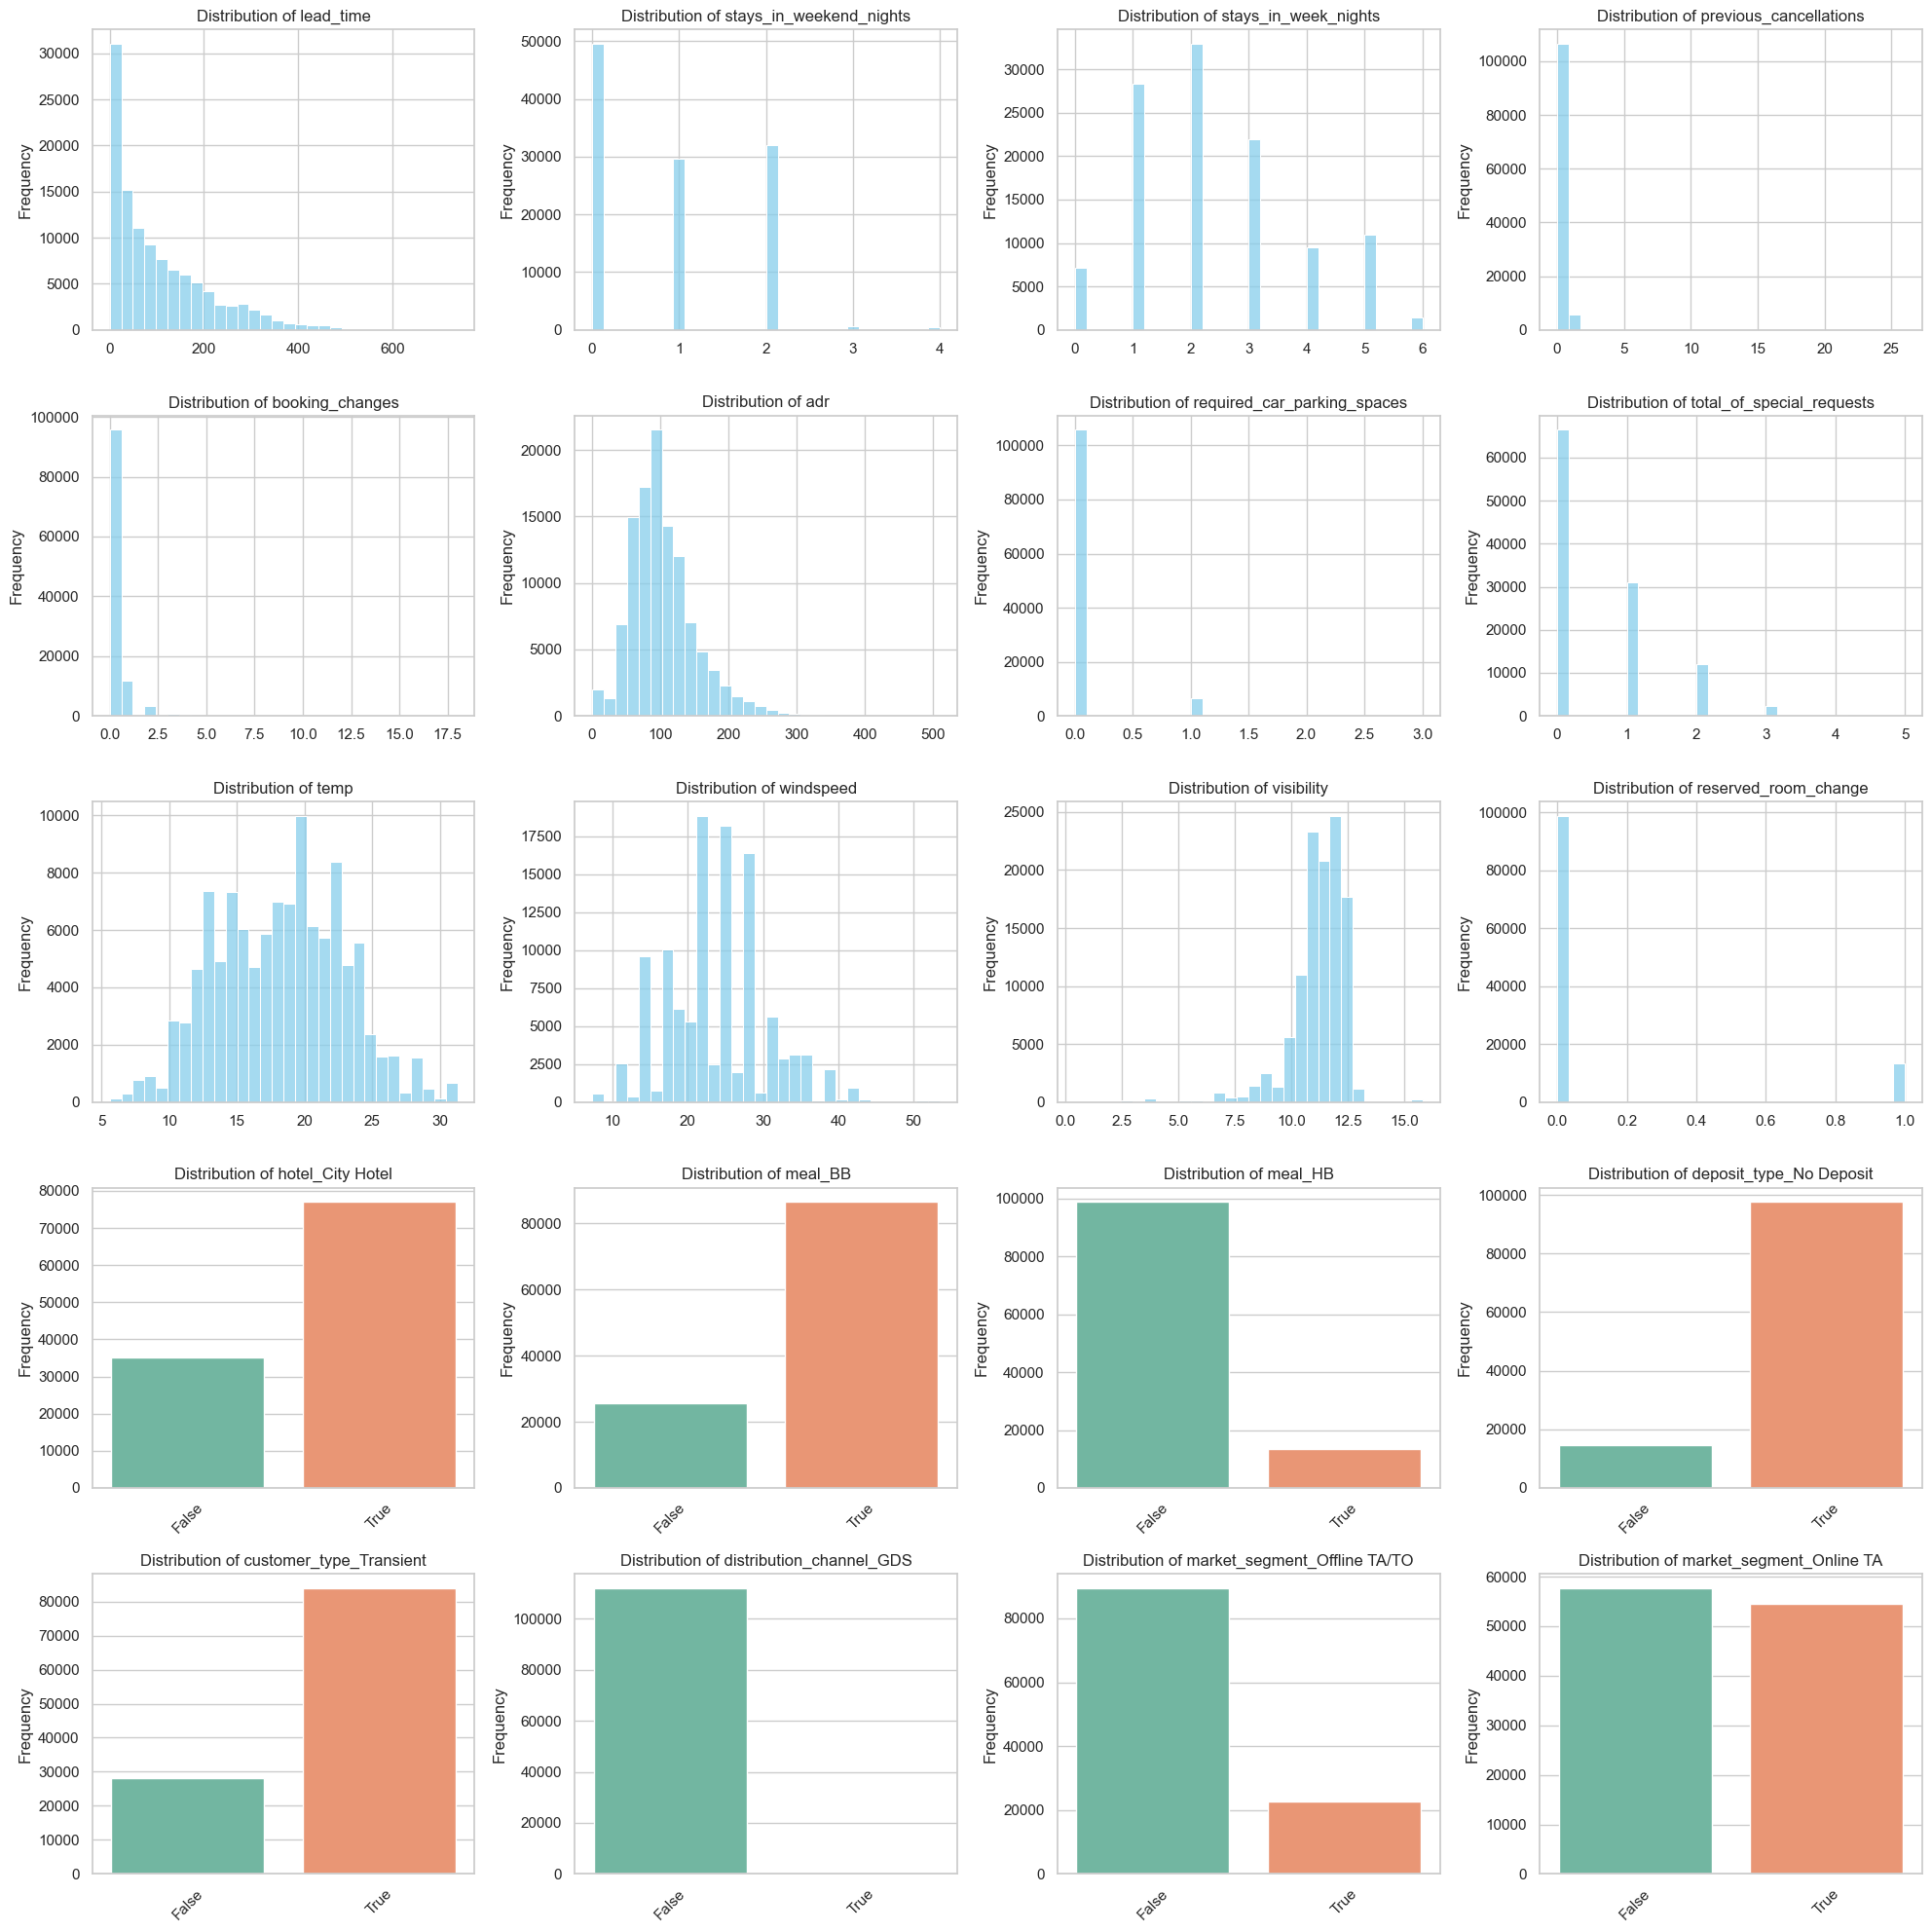

In [19]:
# 设置画布大小
plt.figure(figsize=(20, 20))

# 循环遍历每列
for i, col in enumerate(df_selected.columns):
    plt.subplot(5, 4, i + 1)  # 调整子图布局
    # 判断数据类型，如果是数值型数据，继续使用直方图
    if df_selected[col].dtype in ['int64', 'float64']:
        sns.histplot(df_selected[col], kde=False, bins=30, color='skyblue')
    else:
        # 对于分类数据，使用条形图
        sns.countplot(x=col, data=df_selected, palette='Set2')
        plt.xticks(rotation=45)  # 如果类别标签太长，可以旋转以便查看
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')

# 调整子图间距
plt.tight_layout()
plt.show()

In [20]:
df_selected['is_canceled'] = hotel['is_canceled']

/var/folders/bz/shq74ng152xd2xvygh6vtv940000gn/T/ipykernel_89990/3314176195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['is_canceled'] = hotel['is_canceled']


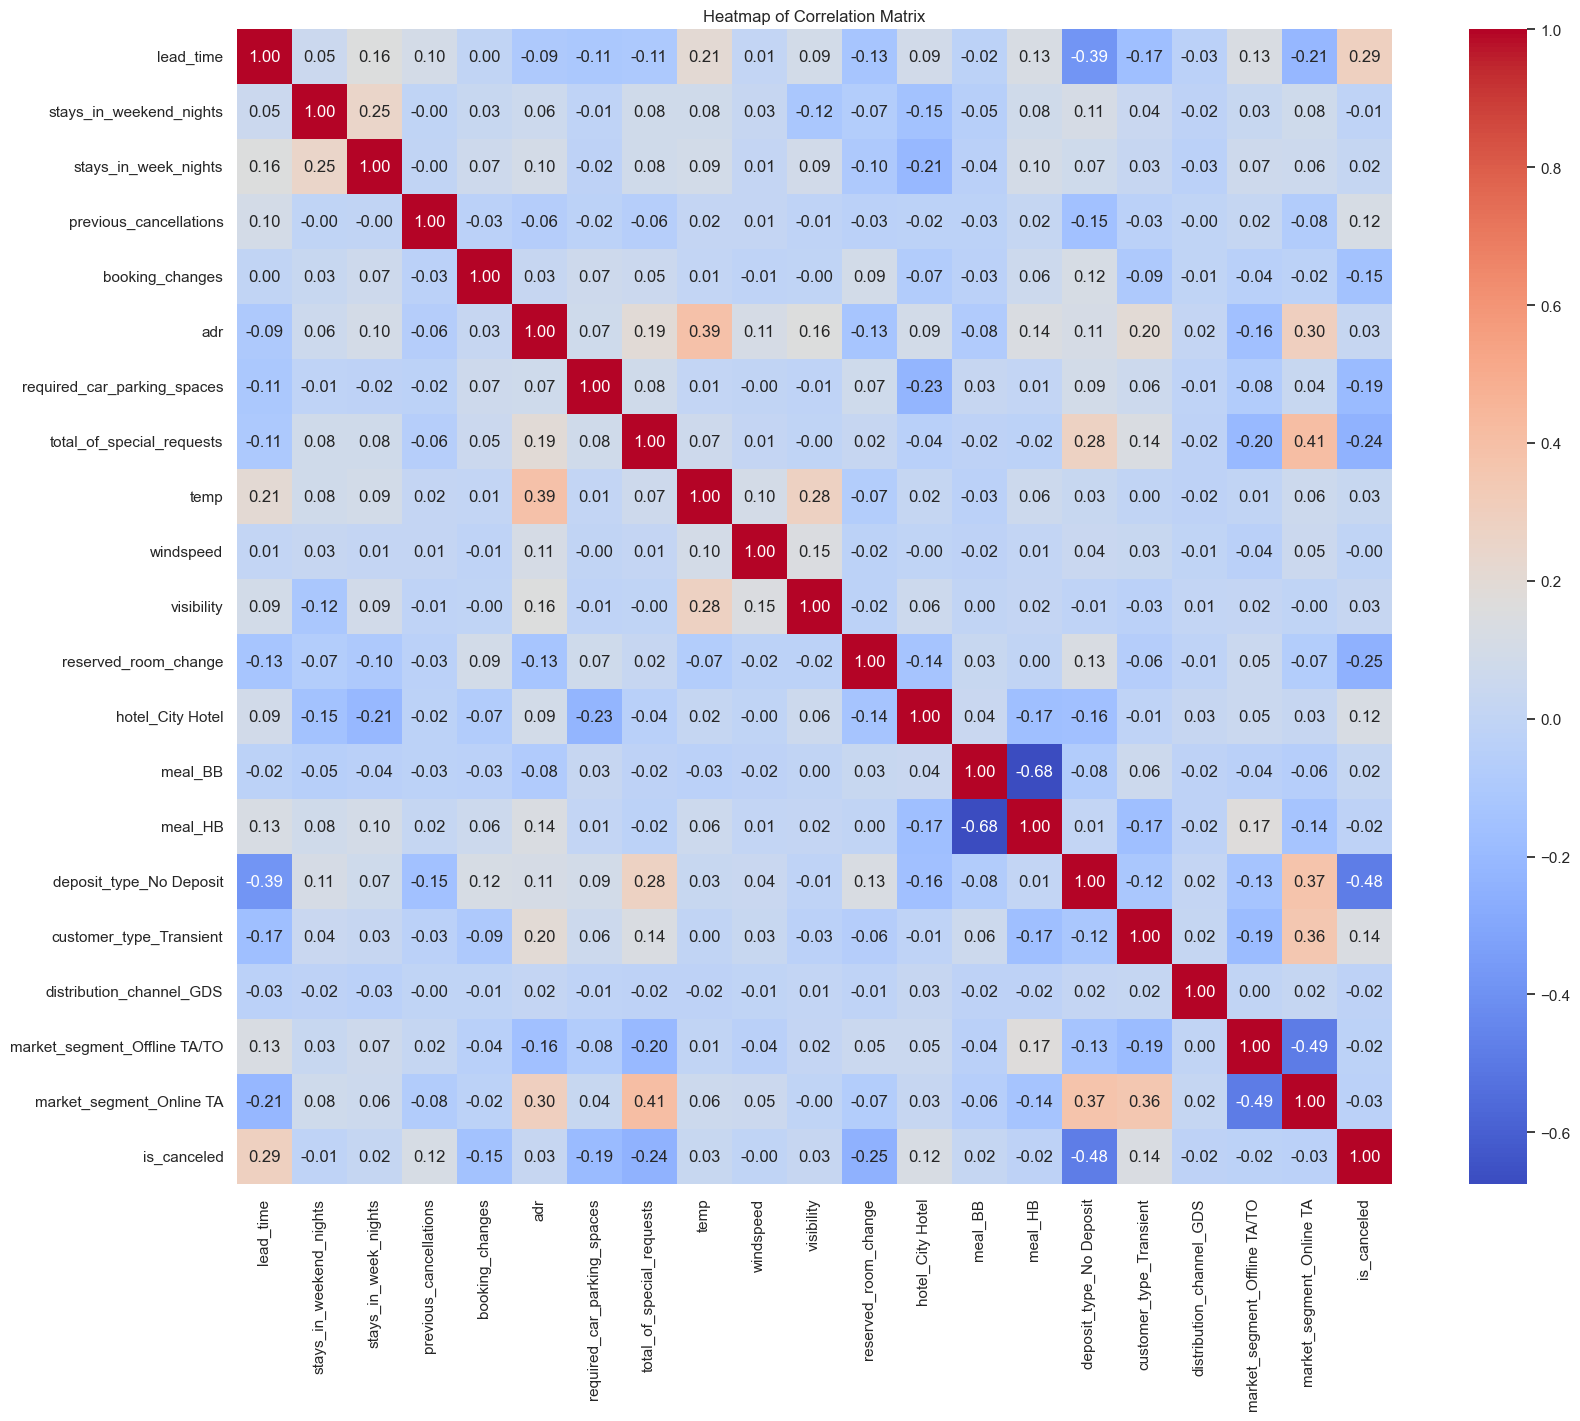

In [21]:
corr = df_selected.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


# 5. Models

## 5.1 ARIMA

In [22]:
hotel.set_index('datetime', inplace=True)

# 创建每日预定数量的时间序列
daily_bookings = hotel.resample('D').size()

In [23]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
model = SARIMAX(daily_bookings, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57428D+00    |proj g|=  9.84980D-02

At iterate    5    f=  5.50191D+00    |proj g|=  1.01253D-02

At iterate   10    f=  5.36836D+00    |proj g|=  6.29296D-02

At iterate   15    f=  5.36254D+00    |proj g|=  6.57025D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     23      1     0     0   4.890D-06   5.363D+00
  F =   5.3625417989049158     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [24]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  793
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4252.496
Date:                            Fri, 03 May 2024   AIC                           8514.991
Time:                                    22:18:24   BIC                           8538.288
Sample:                                07-01-2015   HQIC                          8523.951
                                     - 08-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0173      0.035      0.492      0.622      -0.052       0.086
ma.L1         -0.8950      0.019   

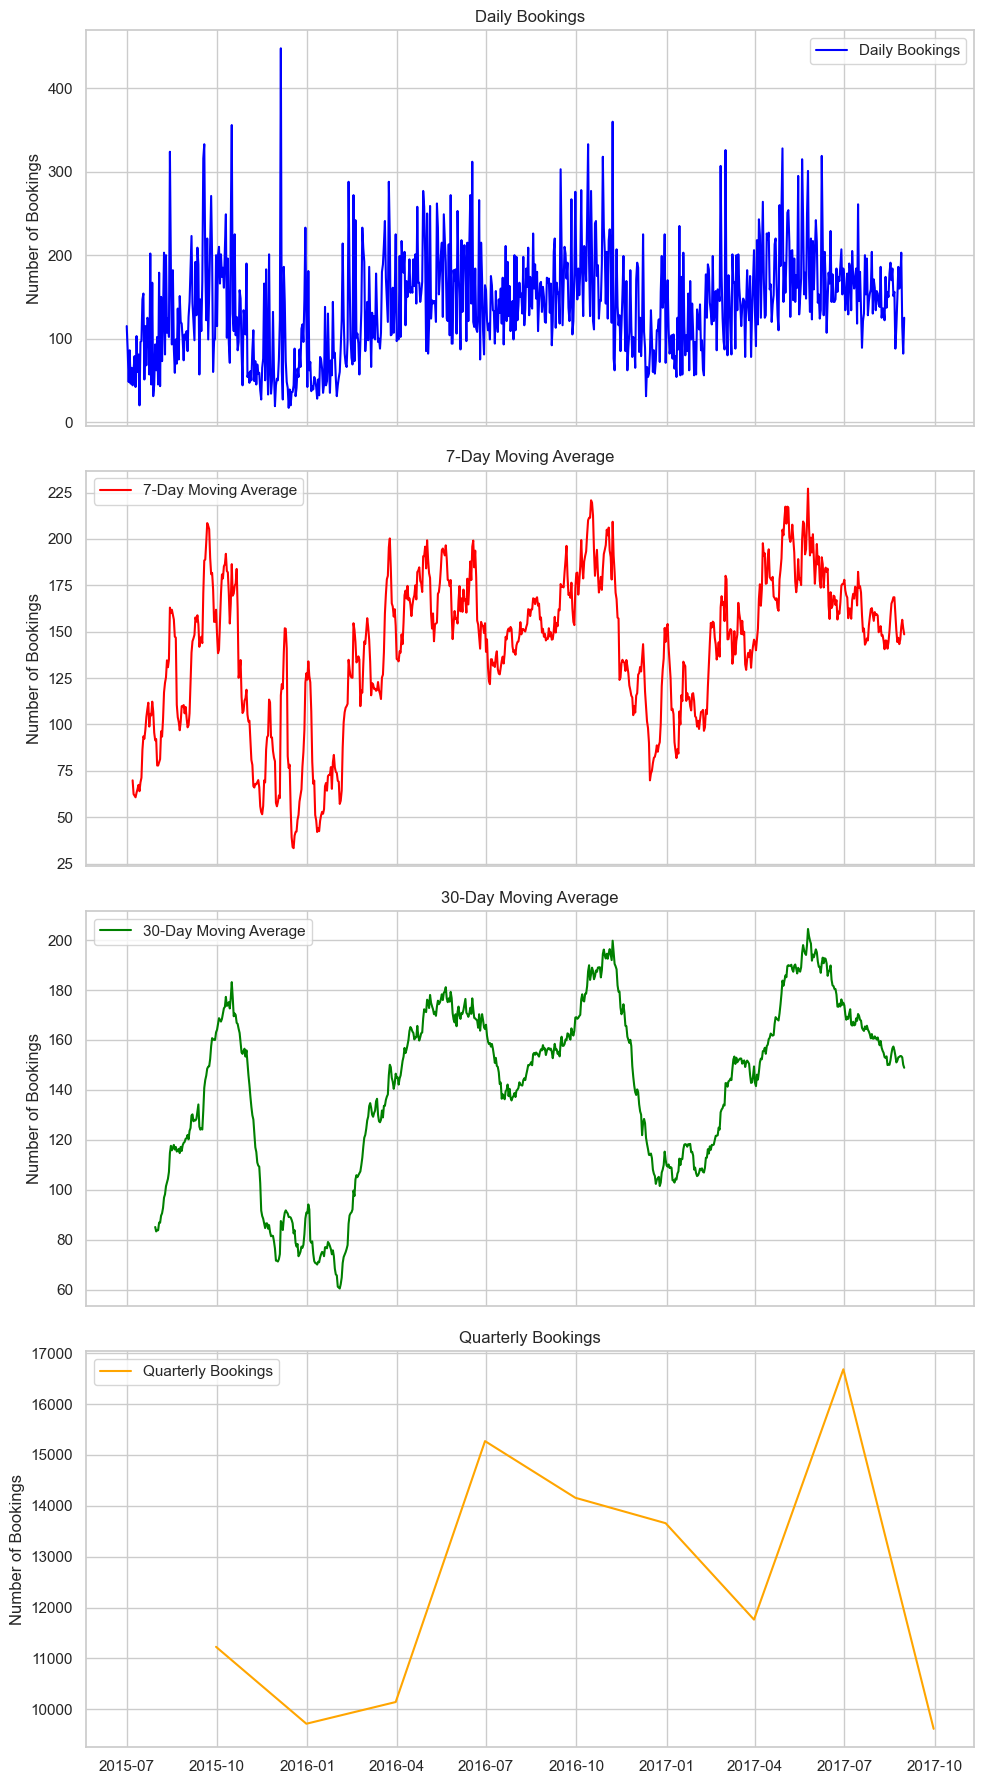

In [25]:
# 创建DataFrame并计算移动平均
daily_bookings_df = pd.DataFrame(daily_bookings, columns=['bookings'])
daily_bookings_df['7-day MA'] = daily_bookings_df['bookings'].rolling(window=7).mean()
daily_bookings_df['30-day MA'] = daily_bookings_df['bookings'].rolling(window=30).mean()

# 计算季度预定量
quarterly_bookings = daily_bookings_df['bookings'].resample('Q').sum()

# 绘制每日预定量、移动平均和季度预定量
fig, axs = plt.subplots(4, 1, figsize=(10, 18), sharex=True)

# 每日预定量
axs[0].plot(daily_bookings_df['bookings'], label='Daily Bookings', color='blue')
axs[0].set_title('Daily Bookings')
axs[0].set_ylabel('Number of Bookings')
axs[0].legend()

# 7天移动平均
axs[1].plot(daily_bookings_df['7-day MA'], label='7-Day Moving Average', color='red')
axs[1].set_title('7-Day Moving Average')
axs[1].set_ylabel('Number of Bookings')
axs[1].legend()

# 30天移动平均
axs[2].plot(daily_bookings_df['30-day MA'], label='30-Day Moving Average', color='green')
axs[2].set_title('30-Day Moving Average')
axs[2].set_ylabel('Number of Bookings')
axs[2].legend()

# 季度预定量
axs[3].plot(quarterly_bookings.index, quarterly_bookings, label='Quarterly Bookings', color='orange')
axs[3].set_title('Quarterly Bookings')
axs[3].set_ylabel('Number of Bookings')
axs[3].legend()

plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

# 计算Q1和Q3
Q1 = daily_bookings.quantile(0.25)
Q3 = daily_bookings.quantile(0.75)
IQR = Q3 - Q1

# 计算异常值边界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 查看边界值是否合理
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)



Lower Bound: -26.5
Upper Bound: 305.5


In [33]:
daily_bookings = daily_bookings.where((daily_bookings >= lower_bound) & (daily_bookings <= upper_bound))

# 检查是否有数据被保留
if daily_bookings.dropna().empty:
    print("所有数据都被识别为异常值，请调整异常值定义。")
else:
    daily_bookings = daily_bookings.dropna()

    # 进行ADF平稳性检测
    from statsmodels.tsa.stattools import adfuller
    result = adfuller(daily_bookings)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

ADF Statistic: -2.214810
p-value: 0.200914


### Daily

In [34]:
from statsmodels.tsa.stattools import adfuller

# 进行ADF平稳性检测
result = adfuller(daily_bookings.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.214810
p-value: 0.200914


In [35]:
# 对数据进行一阶差分
daily_bookings_diff = daily_bookings.diff().dropna()

# 再次进行ADF检测
result_diff = adfuller(daily_bookings_diff)
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])

ADF Statistic: -11.332986
p-value: 0.000000


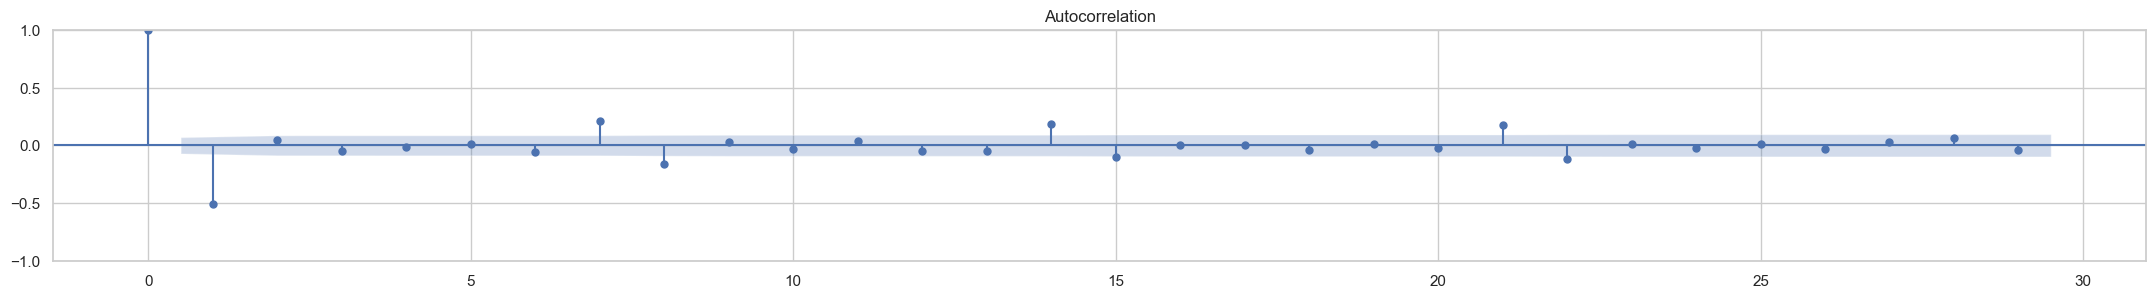

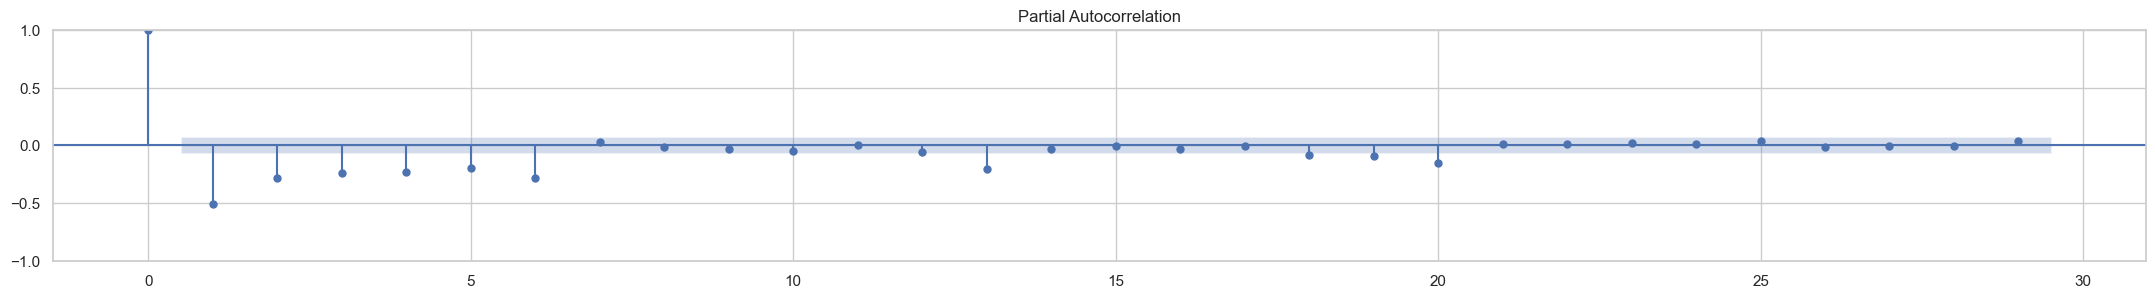

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# 绘制ACF和PACF图
plot_acf(daily_bookings_diff)
plot_pacf(daily_bookings_diff)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarnin

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  778
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4231.651
Date:                Fri, 03 May 2024   AIC                           8469.301
Time:                        22:23:00   BIC                           8483.268
Sample:                             0   HQIC                          8474.674
                                - 778                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5072      0.030    -17.114      0.000      -0.565      -0.449
ma.L1         -0.9999      1.913     -0.523      0.601      -4.748       2.749
sigma2      3116.0728   5953.748      0.523      0.6

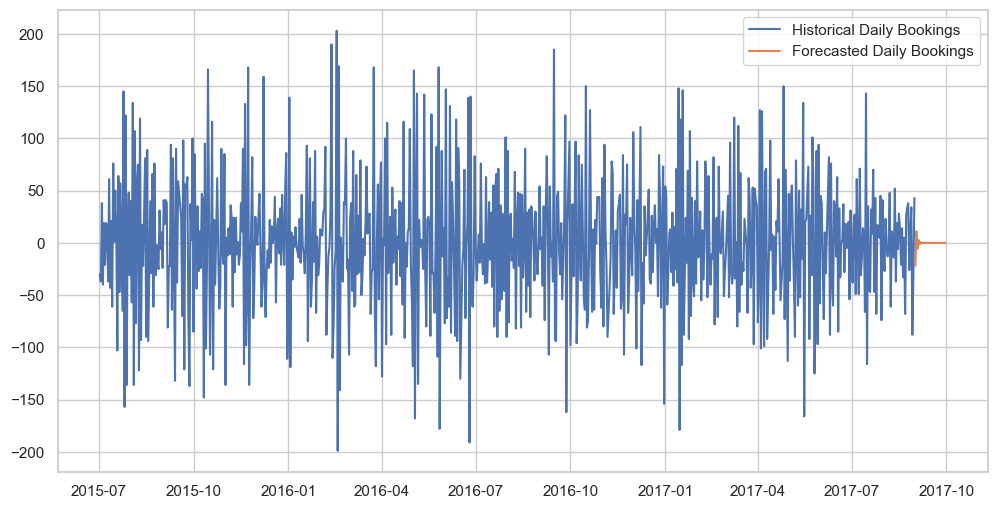

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# 构建并拟合ARIMA模型
model = ARIMA(daily_bookings_diff, order=(1, 1, 1))
fitted_model = model.fit()

# 打印模型的摘要
print(fitted_model.summary())

# 进行预测
forecast = fitted_model.forecast(steps=30)

# 可视化历史数据和预测结果
plt.figure(figsize=(12, 6))
plt.plot(daily_bookings_diff.index, daily_bookings_diff, label='Historical Daily Bookings')
plt.plot(pd.date_range(daily_bookings_diff.index[-1], periods=31, freq='D')[1:], forecast, label='Forecasted Daily Bookings')
plt.legend()
plt.show()


In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 构建并拟合SARIMA模型，这里只是一个起始参数设置的例子
sarima_model1 = SARIMAX(daily_bookings_diff, 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 90),
                       method='nm')
sarima_result1 = sarima_model1.fit()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.09703D+00    |proj g|=  1.39436D-01


 This problem is unconstrained.



At iterate    5    f=  5.05125D+00    |proj g|=  1.51909D-02

At iterate   10    f=  4.95252D+00    |proj g|=  5.25462D-02

At iterate   15    f=  4.91541D+00    |proj g|=  7.51340D-03

At iterate   20    f=  4.91396D+00    |proj g|=  5.92161D-04

At iterate   25    f=  4.91375D+00    |proj g|=  7.72781D-04

At iterate   30    f=  4.91372D+00    |proj g|=  1.01038D-04


KeyboardInterrupt: 

In [ ]:
print(sarima_result1.summary())

In [ ]:
# 进行预测
sarima_forecast = sarima_result1.get_forecast(steps=90)
forecast_index = pd.date_range(start=daily_bookings.index[-1], periods=91, freq='D')[1:]
forecast_mean = sarima_forecast.predicted_mean
forecast_conf_int = sarima_forecast.conf_int()
# 可视化历史数据和预测结果
plt.figure(figsize=(10, 6))
plt.plot(daily_bookings.index, daily_bookings, label='Historical Daily Bookings')
plt.plot(forecast_index, forecast_mean, label='Forecasted Daily Bookings', color='red')
plt.fill_between(forecast_index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.legend()
plt.title('SARIMA Model Forecast')
plt.show()

In [ ]:
# 检查残差
residuals = sarima_result1.resid

# 残差的图表分析
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# 残差的自相关图
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.show()



### Month

In [ ]:
month_bookings = daily_bookings.asfreq('M')
sarima_model2 = SARIMAX(month_bookings, 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 4))
sarima_result2 = sarima_model2.fit()

# 打印模型的摘要
print(sarima_result2.summary())

In [ ]:
# 进行预测
sarima_forecast = sarima_result2.get_forecast(steps=4)
forecast_index = pd.date_range(start=month_bookings.index[-1], periods=5, freq='M')[1:]
forecast_mean = sarima_forecast.predicted_mean
forecast_conf_int = sarima_forecast.conf_int()
# 可视化历史数据和预测结果
plt.figure(figsize=(10, 6))
plt.plot(month_bookings.index, month_bookings, label='Historical Month Bookings')
plt.plot(forecast_index, forecast_mean, label='Forecasted Daily Bookings', color='red')
plt.fill_between(forecast_index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.legend()
plt.title('SARIMA Model Forecast')
plt.show()

In [ ]:
# 检查残差
residuals = sarima_result2.resid

# 残差的图表分析
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# 残差的自相关图
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.show()

## References
__Dataset source__: https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-02-11

__Domain Knowledge__:  
Antonio, N., de Almeida, A., and Nunes, L. (2019). Hotel booking demand datasets: https://www.sciencedirect.com/science/article/pii/S2352340918315191  
GDMBF: AR | MA | ARMA | ARIMA | SARIMA| AUTO ARIMA： https://www.kaggle.com/code/tanmay111999/gdmbf-ar-ma-arma-arima-sarima-auto-arima
